<div style="background-color: #D5B276; padding: 20px; border-radius: 10px; font-size: 28px; font-weight: bold; font-family: Arial, sans-serif;">
 Introduction
</div>


<div style="font-family: Arial, sans-serif;">
In this portfolio project, we delve into the realm of movies, exploring various facets such as budget, gross earnings, ratings, and more. The dataset used here encompasses a diverse range of movies, allowing for a multifaceted analysis. Through visualizations and statistical techniques, we aim to uncover insights into what makes a movie successful, both critically and commercially.
</div>

<div style="background-color: #D5B276; padding: 20px; border-radius: 10px; font-size: 28px; font-weight: bold;
font-family: Arial, sans-serif;"> 
    Importing Libraires
</div>


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Set plot style and figure size
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
# Read the data
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<div style="background-color: #D5B276; padding: 20px; border-radius: 10px; font-size: 28px; font-weight: bold;
font-family: Arial, sans-serif;"> 
    Cleaning and Formatting
</div>


In [15]:
# Identifying missing values
df.isnull().sum()

# Formatting the data
columns_to_check = ['rating', 'released', 'score', 'votes', 'writer', 'star', 'country', 'company', 'runtime', 'gross']
df = df.dropna(subset=columns_to_check)

# Impute numerical columns with mean
df['budget'] = df['budget'].fillna(df['budget'].mean())

# Change data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

# Correct Year
df['correct year'] = df['released'].str.split('(').str[0]
df['correct year'] = pd.to_datetime(df['correct year']).dt.year
df.sort_values(by='gross', inplace=True, ascending=False)

# Drop any duplicates
df = df.drop_duplicates()

# Convert categorical data into numerical format for correlation analysis
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

<div style="background-color: #D5B276; padding: 20px; border-radius: 10px; font-size: 28px; font-weight: bold;
font-family: Arial, sans-serif;"> 
   Analysis
</div>


In [7]:
# Top 15 companies by gross revenue
CompanyGrossSum = df.groupby(['company', 'year'])[['gross']].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross', 'company', 'year'], ascending=False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')
CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

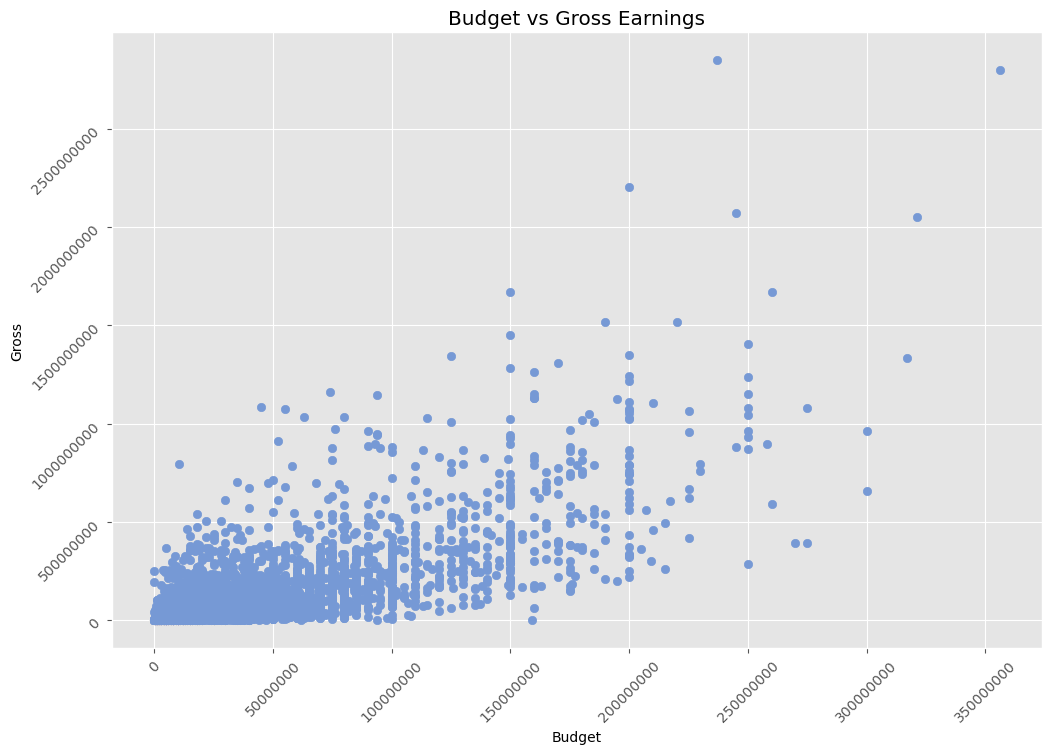

In [9]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'], color='#7699D5')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='both')
plt.show()

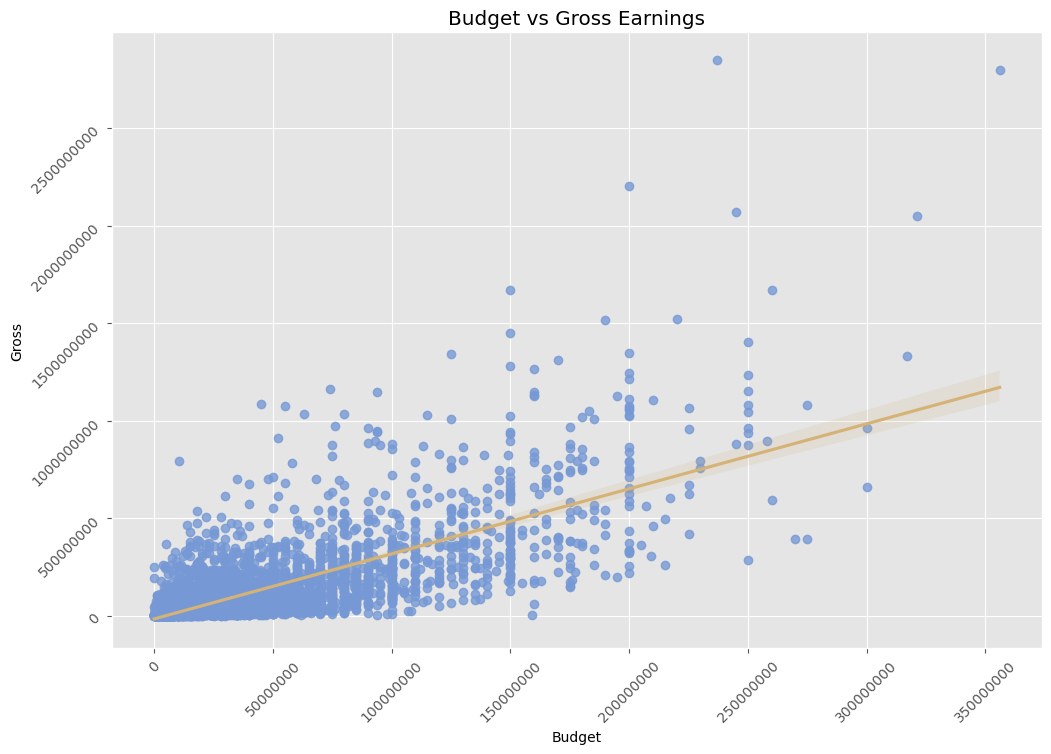

In [11]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': '#7699D5'}, line_kws={'color': '#D5B276'})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='both')
plt.show()

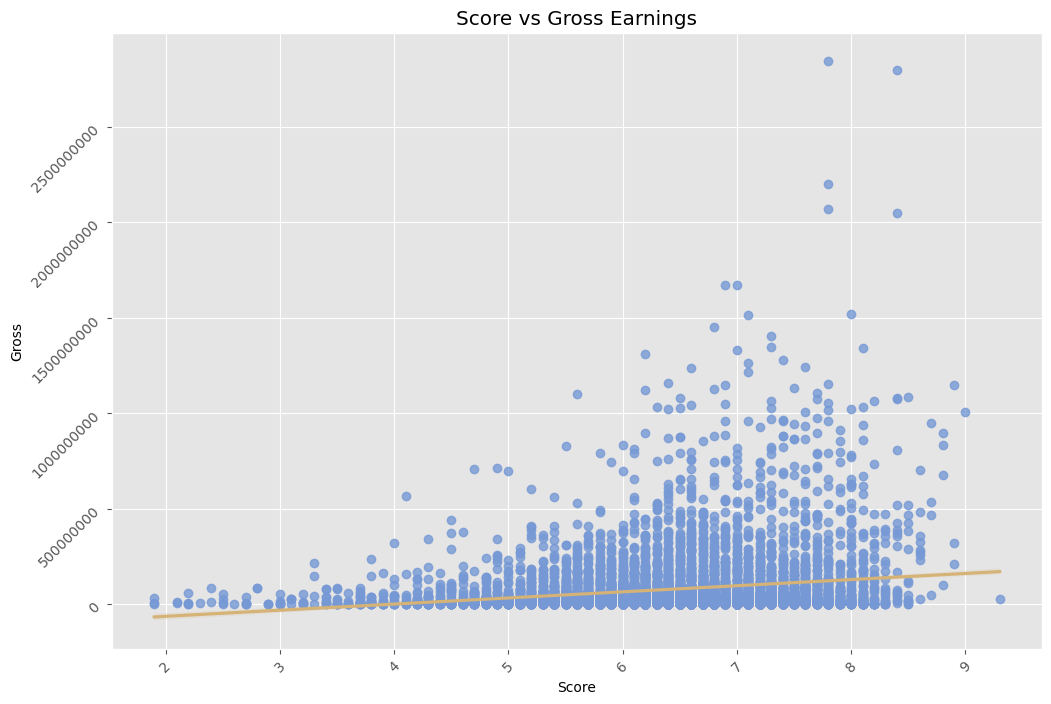

In [12]:
# Plot score vs gross using seaborn
sns.regplot(x='score', y='gross', data=df, scatter_kws={'color': '#7699D5'}, line_kws={'color': '#D5B276'})
plt.title('Score vs Gross Earnings')
plt.xlabel('Score')
plt.ylabel('Gross')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='both')
plt.show()

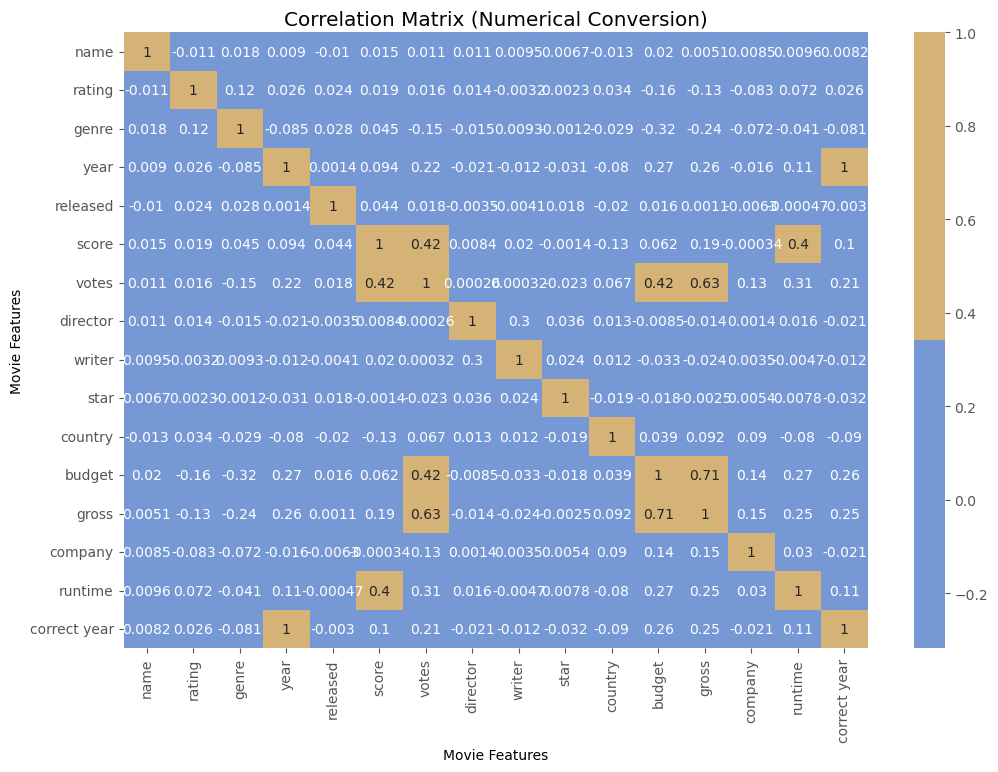

In [16]:
# Correlation matrix after numerical conversion
correlation_matrix = df_numerized.corr(method='pearson')
colors = ["#7699D5", "#D5B276"]
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(colors))
plt.title('Correlation Matrix (Numerical Conversion)')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [18]:
# Explore high correlations
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes         gross           0.631110
gross         votes           0.631110
              budget          0.713359
budget        gross           0.713359
correct year  year            0.997548
year          correct year    0.997548
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct year  correct year    1.000000
dtype: float64